In [26]:
import keras

In [27]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

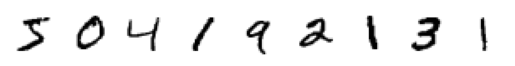

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 9)
for ax, digit in zip(axes, train_images[:9]):
    ax.set_axis_off()
    ax.imshow(digit, cmap=plt.cm.binary)

Skapar neuralt nätverk

In [12]:
from keras import layers
model = keras.models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

kompilerar vårt NN

In [13]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


flatten och normalize train och test data

In [14]:
train_images = train_images.reshape([60000, 28*28]) # flatten
train_images = train_images.astype('float32') / 255 # normalize
test_images = test_images.reshape([10000, 28*28]) # flatten
test_images = test_images.astype('float32') / 255 # normalize

Tränar modellen

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8721 - loss: 0.4453
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9657 - loss: 0.1185
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9791 - loss: 0.0724
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9848 - loss: 0.0535
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9889 - loss: 0.0375


In [16]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0].argmax(), test_labels[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


(np.int64(7), np.uint8(7))

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9757 - loss: 0.0739
test_acc: 0.979200005531311
